In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [343]:
file_path = './vehicles/vehicles.csv'
df = pd.read_csv(file_path)

The attributes that we are working with:

In [344]:
print(df.head())

   cena       marka    model  godina proizvodnje  kilometraža karoserija  \
0  8650       Škoda  Octavia                2016       196000    Karavan   
1  3500     Peugeot      207                2009       243892     Hečbek   
2  7000        Audi       A4                2008       211429   Limuzina   
3  1450  Alfa Romeo      147                2008       315000     Hečbek   
4  2899     Peugeot      307                2008       190000    Karavan   

   gorivo  kubikaža  snaga motora                       menjač broj vrata  \
0   Dizel      1968           150            Manuelni 6 brzina  4/5 vrata   
1   Dizel      1560            90            Manuelni 5 brzina  4/5 vrata   
2  Benzin      1798           160            Manuelni 6 brzina  4/5 vrata   
3   Dizel      1910           120            Manuelni 6 brzina  4/5 vrata   
4   Dizel      1997           136  Automatski / poluautomatski  4/5 vrata   

              klima  
0  Automatska klima  
1    Manuelna klima  
2    Manuelna 

Basic statistics about the dataset:

In [345]:
print(df.describe())

                cena  godina proizvodnje   kilometraža      kubikaža  \
count   58622.000000        58622.000000  5.862200e+04  5.862200e+04   
mean     9700.740643         2009.516905  2.086623e+05  3.136385e+03   
std     12993.540219            6.593926  1.338493e+05  1.552663e+05   
min         0.000000         1927.000000  0.000000e+00  0.000000e+00   
25%      3200.000000         2006.000000  1.654000e+05  1.496000e+03   
50%      5800.000000         2009.000000  2.040000e+05  1.895000e+03   
75%     11500.000000         2014.000000  2.490000e+05  1.995000e+03   
max    360000.000000         2024.000000  3.960000e+06  2.148215e+07   

       snaga motora  
count  58622.000000  
mean     132.965849  
std       57.838515  
min       18.000000  
25%      101.000000  
50%      120.000000  
75%      150.000000  
max      935.000000  


Missing values in the dataset:

In [346]:
print(df.isnull().sum()) # Detect missing values
df = df.dropna() # Remove null values

cena                  0
marka                 0
model                 0
godina proizvodnje    0
kilometraža           0
karoserija            2
gorivo                0
kubikaža              0
snaga motora          0
menjač                0
broj vrata            1
klima                 1
dtype: int64


Basic distribution of numerical features:

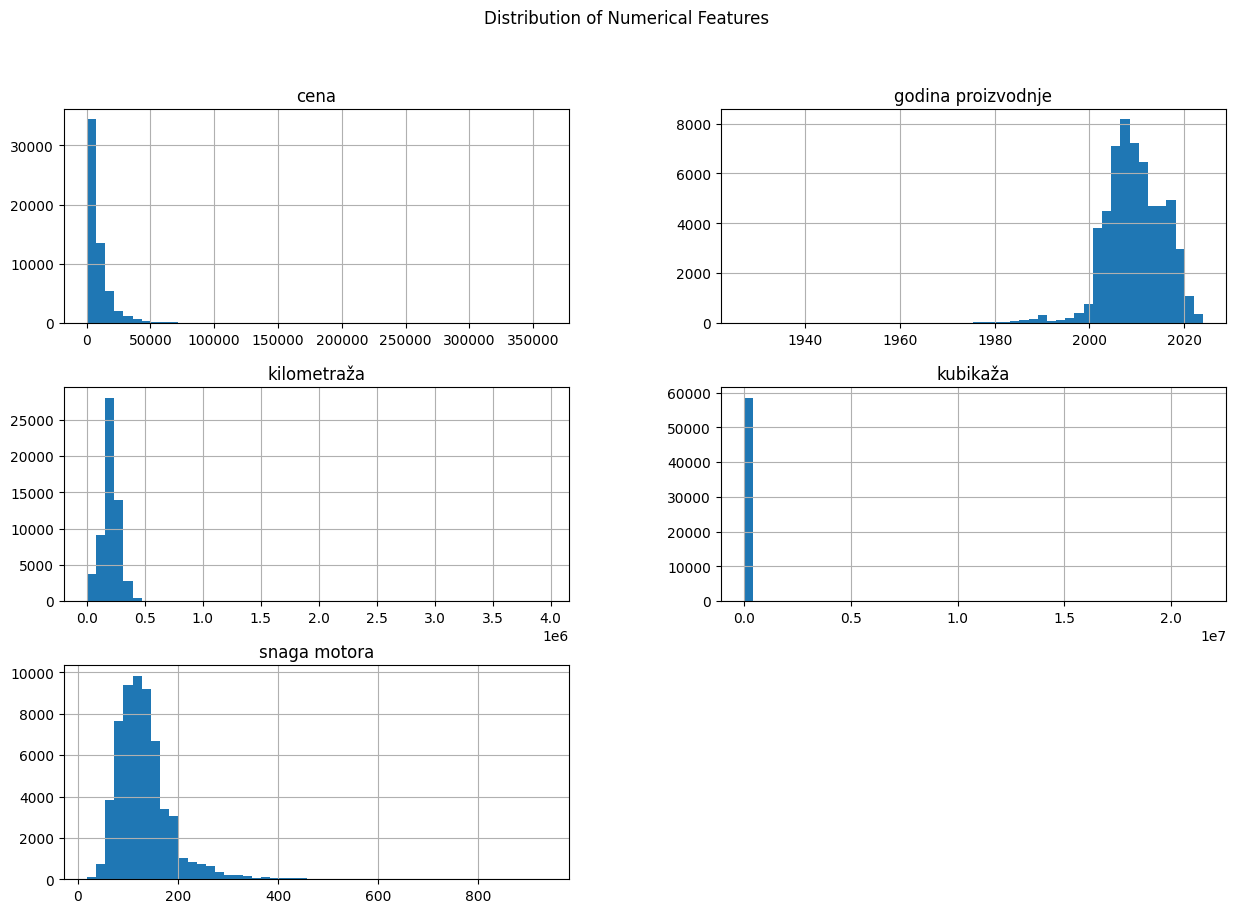

In [347]:
numerical_features = ['cena', 'godina proizvodnje', 'kilometraža', 'kubikaža', 'snaga motora']
df[numerical_features].hist(bins=50, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

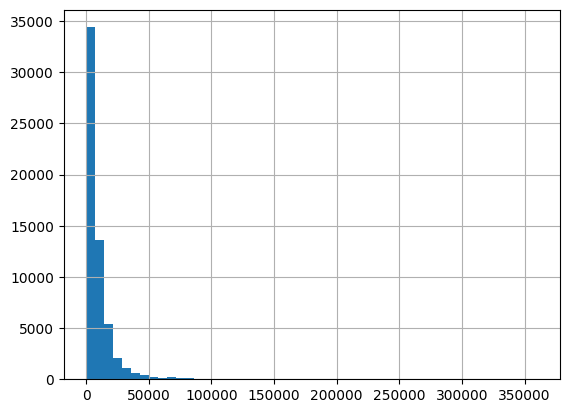

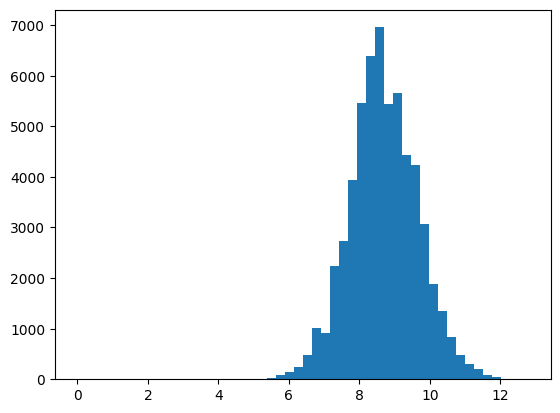

In [348]:
df['cena'].hist(bins=50)
plt.show()

df = df[df['cena'] > 0]
plt.hist(np.log(df['cena']), bins=50)
plt.show()

df['cena'] = np.log(df['cena'])

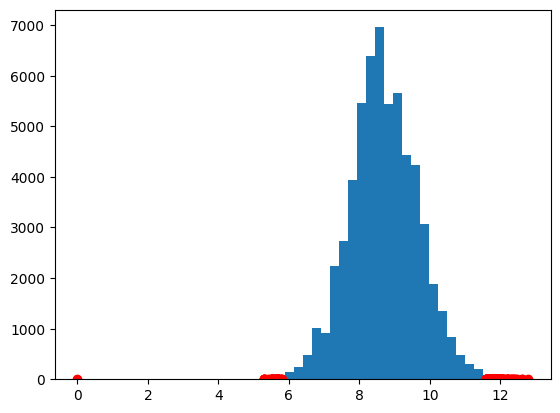

Removed 202 vehicles.


In [349]:
threshold = 3
price_outliers = df[np.abs(stats.zscore(df['cena'])) > threshold]

plt.hist(df['cena'], bins=50)
plt.scatter(price_outliers['cena'], np.zeros(len(price_outliers)), c='r')
plt.show()

print("Removed %d vehicles." % len(price_outliers['cena']))

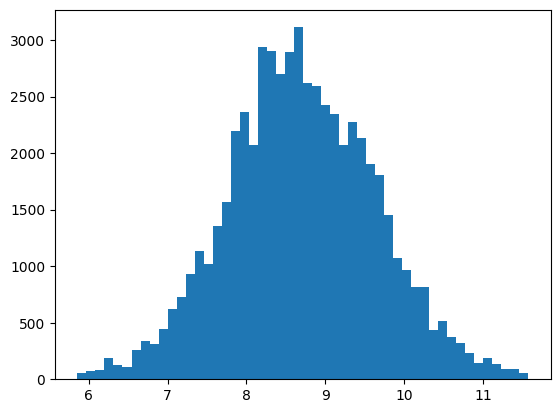

In [350]:
threshold = 3
df = df[np.abs(stats.zscore(df['cena'])) <= threshold]

plt.hist(df['cena'], bins=50)
plt.show()

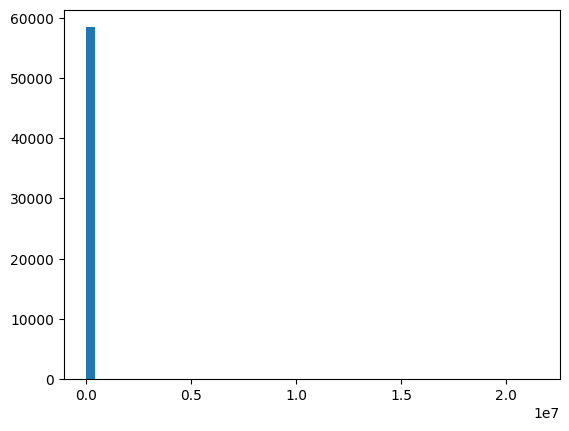

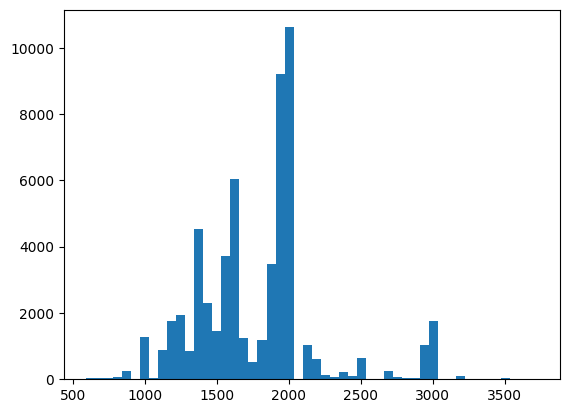

Removed 666 vehicles.


In [351]:
plt.hist(df['kubikaža'], bins=50)
plt.show()

def remove_outliers(property, multiplier=3.5):
    Q1 = df[property].quantile(0.25)
    Q3 = df[property].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return df[(df[property] >= lower_bound) & (df[property] <= upper_bound)]

df_filtered = remove_outliers('kubikaža')

df_filtered = df_filtered[df_filtered['kubikaža'] > 500]

plt.hist(df_filtered['kubikaža'], bins=50)
plt.show()

print("Removed %d vehicles." % (len(df) - len(df_filtered)))

df = df_filtered

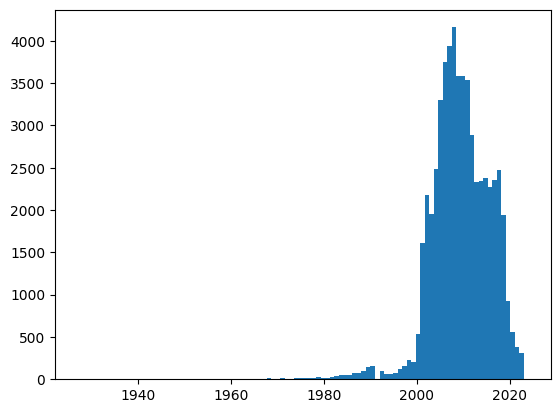

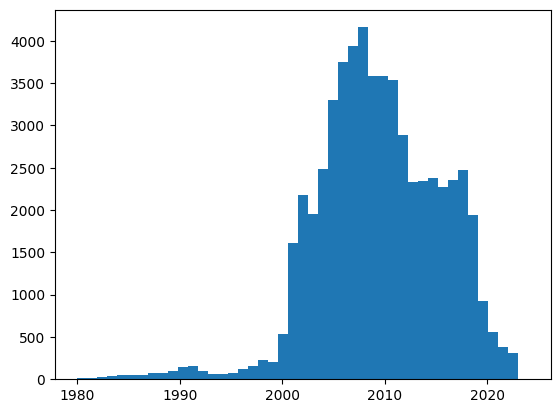

Removed 174 vehicles.


In [352]:
plt.hist(df['godina proizvodnje'], bins=100)
plt.show()

df_filtered = df[df['godina proizvodnje'] >= 1980]

plt.hist(df_filtered['godina proizvodnje'], bins=45)
plt.show()

print("Removed %d vehicles." % (len(df) - len(df_filtered)))

df = df_filtered

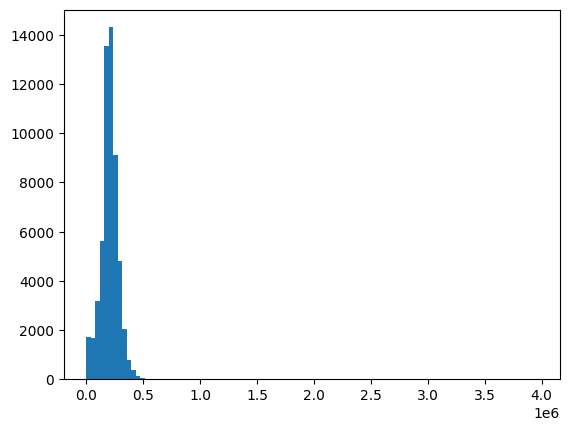

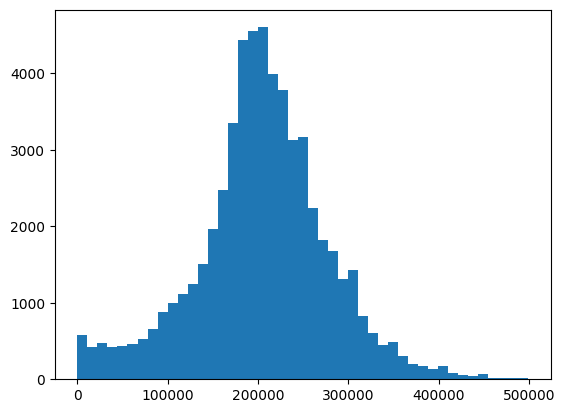

Removed 240 vehicles.


In [353]:
plt.hist(df['kilometraža'], bins=100)
plt.show()

df_filtered = df[df['kilometraža'] < 500_000]

plt.hist(df_filtered['kilometraža'], bins=45)
plt.show()

print("Removed %d vehicles." % (len(df) - len(df_filtered)))

df = df_filtered

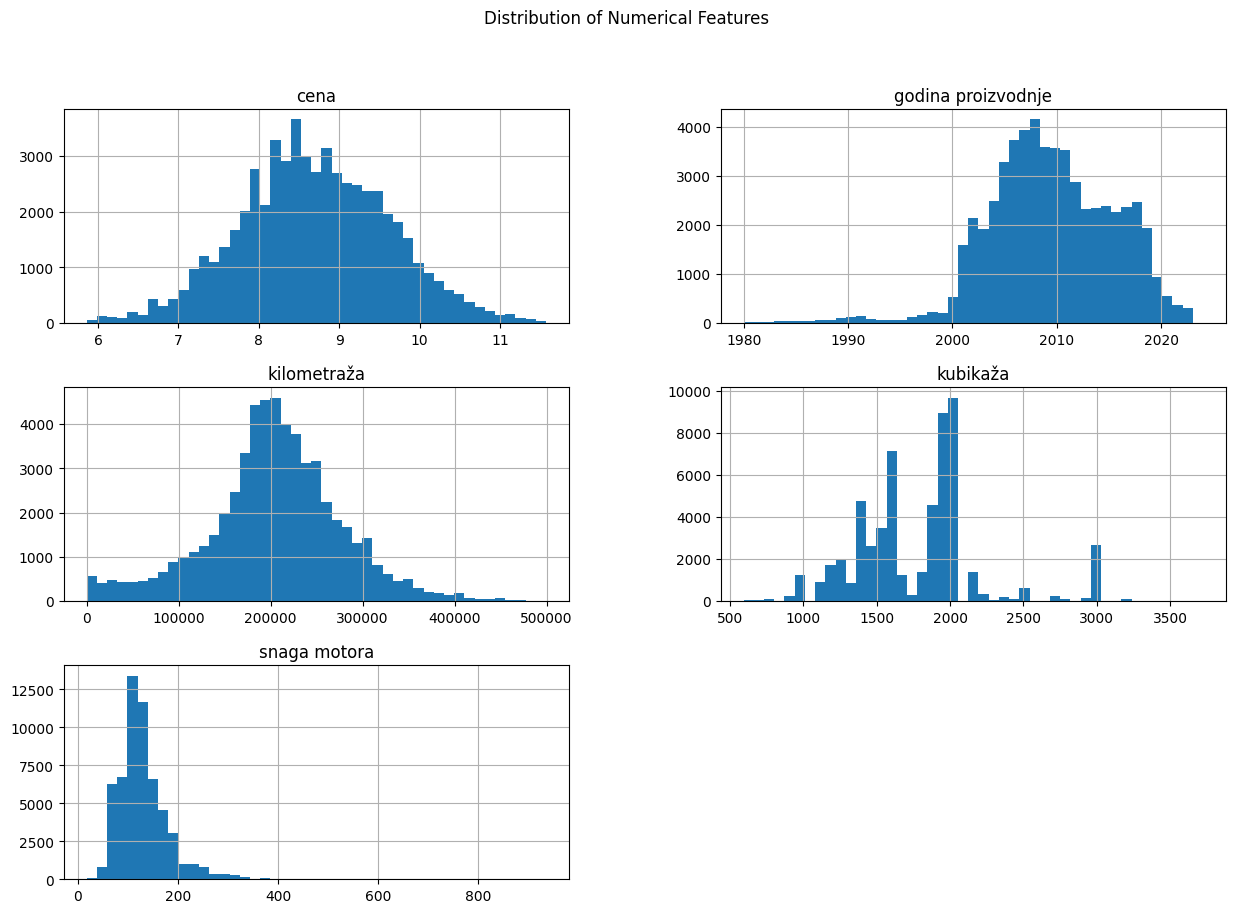

In [354]:
numerical_features = ['cena', 'godina proizvodnje', 'kilometraža', 'kubikaža', 'snaga motora']
df[numerical_features].hist(bins=45, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

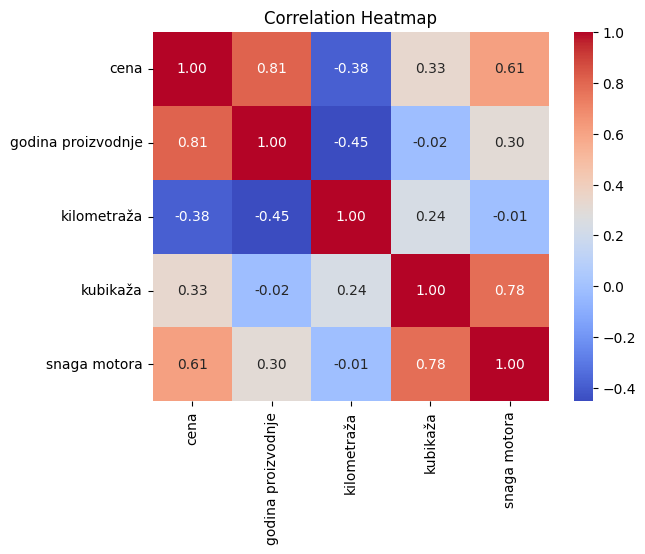

In [355]:
correlation_matrix = df_filtered[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_569716/2988702107.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


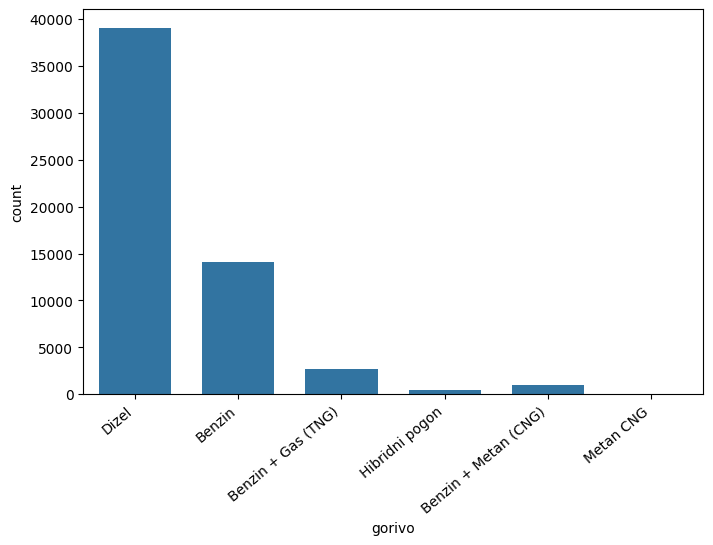

/tmp/ipykernel_569716/2988702107.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


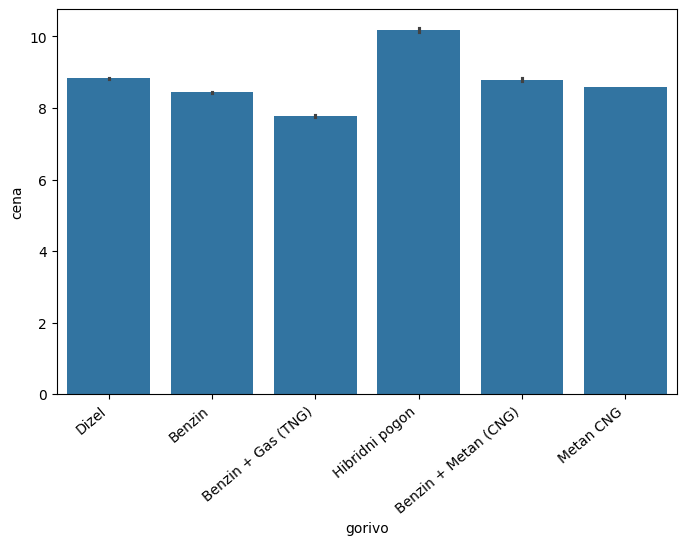

In [356]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='gorivo', data=df, width=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(8,5))
ax = sns.barplot(x='gorivo', y='cena', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

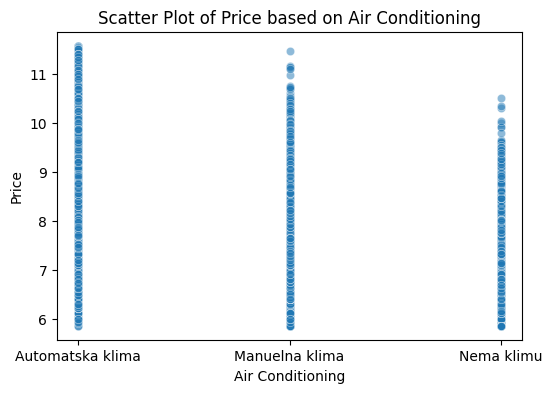

<Axes: xlabel='klima', ylabel='cena'>

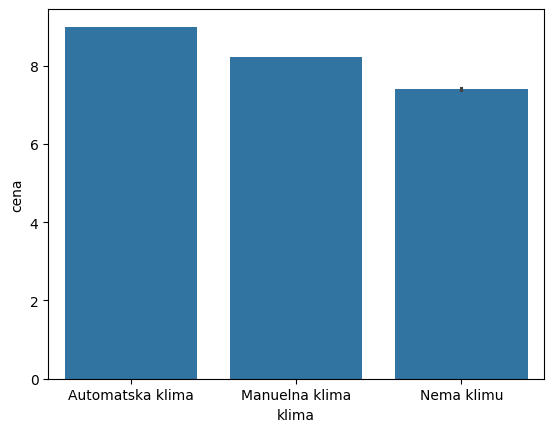

In [357]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='klima', y='cena', data=df, alpha=0.5)
plt.title('Scatter Plot of Price based on Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Price')
plt.show()

sns.barplot(x='klima', y='cena', data=df)

/tmp/ipykernel_569716/788570408.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


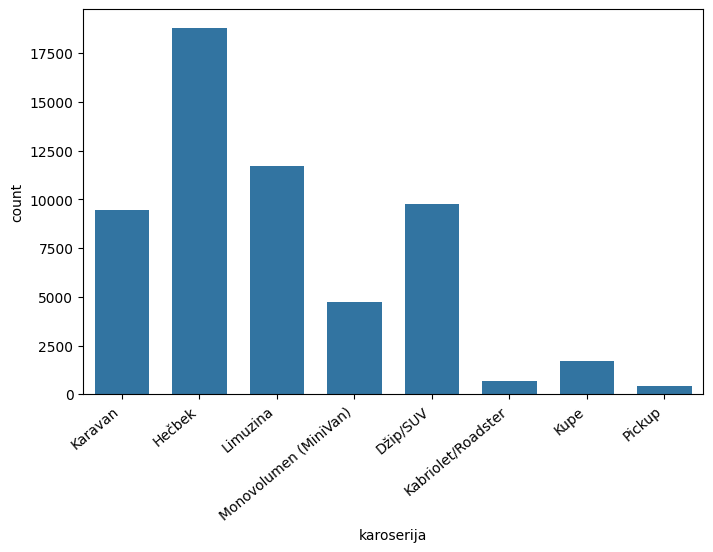

/tmp/ipykernel_569716/788570408.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


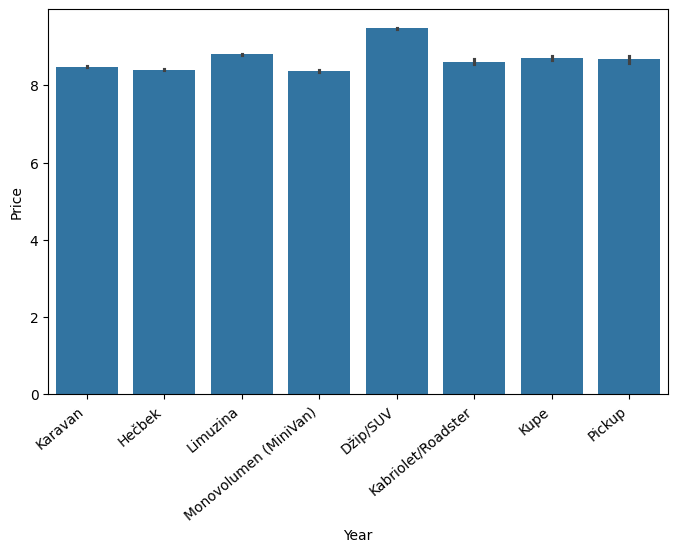

<Figure size 800x500 with 0 Axes>

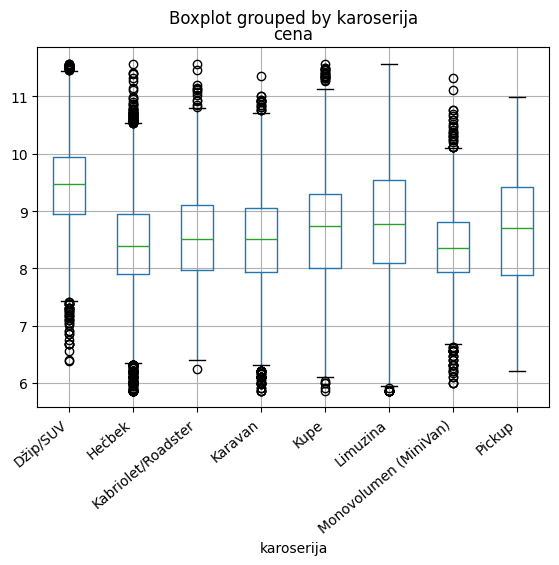

In [358]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='karoserija', data=df, width=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

plt.figure(figsize=(8,5))
ax = sns.barplot(x='karoserija', y='cena', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8,5))
ax = df.boxplot(column='cena', by='karoserija')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<Figure size 1200x600 with 0 Axes>

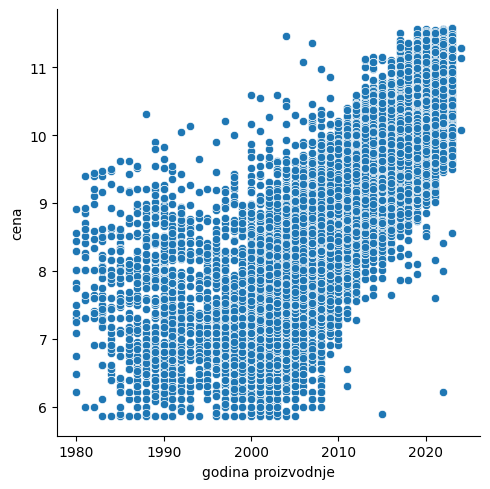

In [359]:
plt.figure(figsize=(12,6))
sns.relplot(x='godina proizvodnje', y='cena', data=df)
plt.show()

<Figure size 1200x600 with 0 Axes>

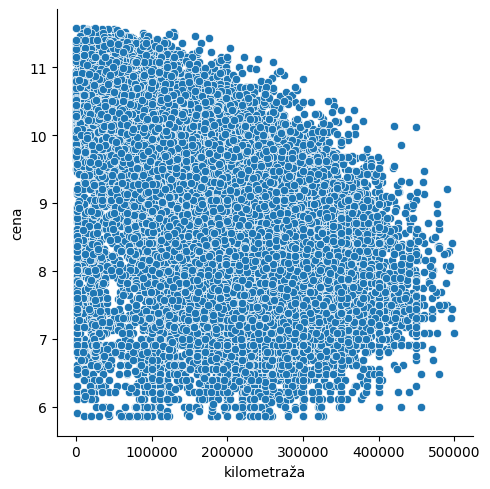

In [360]:
plt.figure(figsize=(12,6))
sns.relplot(x='kilometraža', y='cena', data=df)
plt.show()

<Figure size 1200x600 with 0 Axes>

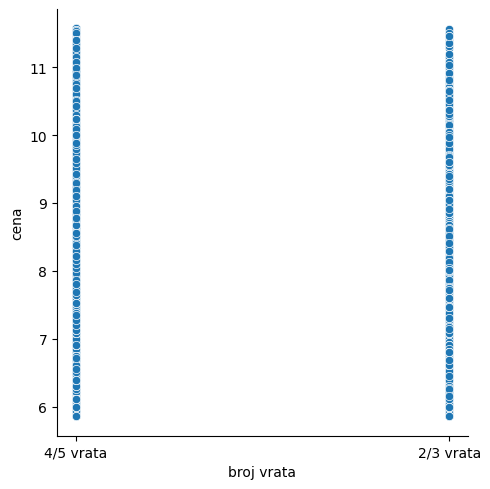

In [361]:
plt.figure(figsize=(12,6))
sns.relplot(x='broj vrata', y='cena', data=df)
plt.show()

<Figure size 800x200 with 0 Axes>

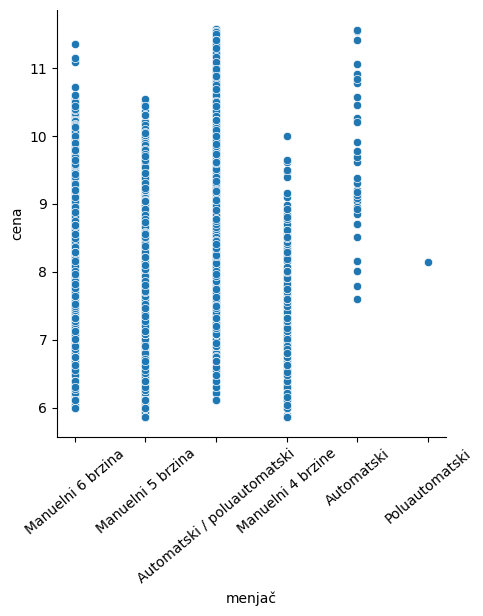

In [374]:
plt.figure(figsize=(8, 2))
g = sns.relplot(x='menjač', y='cena', data=df)
g.set_xticklabels(rotation=40)
plt.show()

<Figure size 1200x600 with 0 Axes>

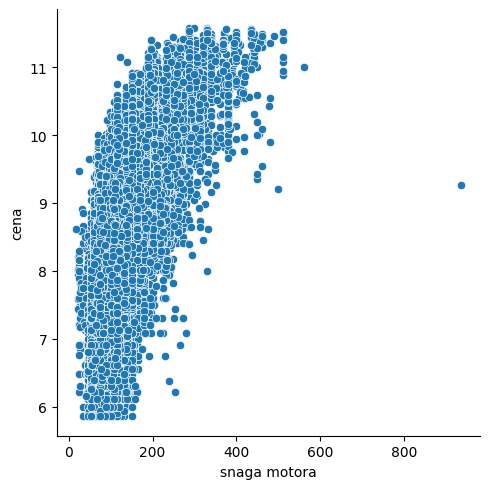

In [375]:
plt.figure(figsize=(12,6))
sns.relplot(x='snaga motora', y='cena', data=df)
plt.show()